<a href="https://colab.research.google.com/github/FreMeli/Machine/blob/main/PF_PAU_ERICK_FREYA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans


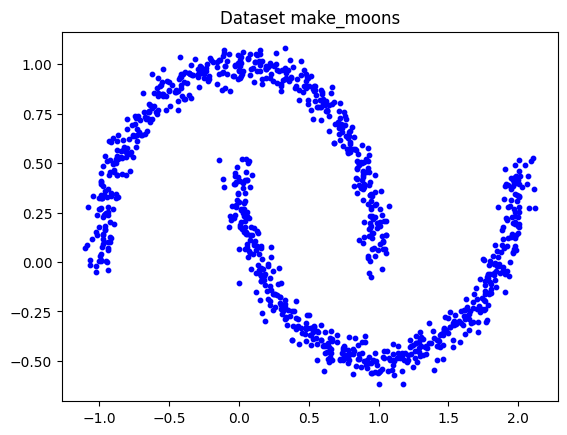

In [ ]:
# Crear el dataset con make_moons
np.random.seed(42)
X, y = make_moons(n_samples=1000, noise=0.05)

# Visualizar el dataset
plt.scatter(X[:, 0], X[:, 1], s=10, c='blue')
plt.title("Dataset make_moons")
plt.show()

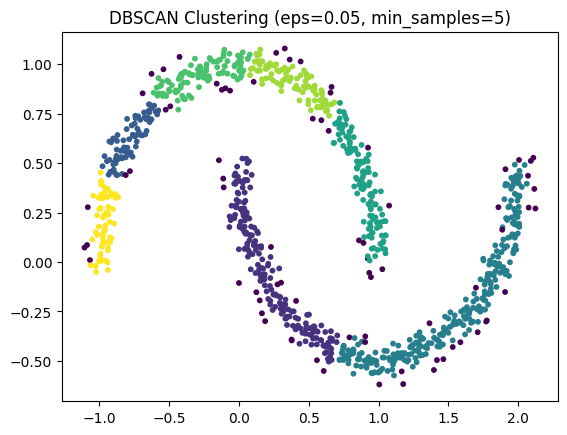

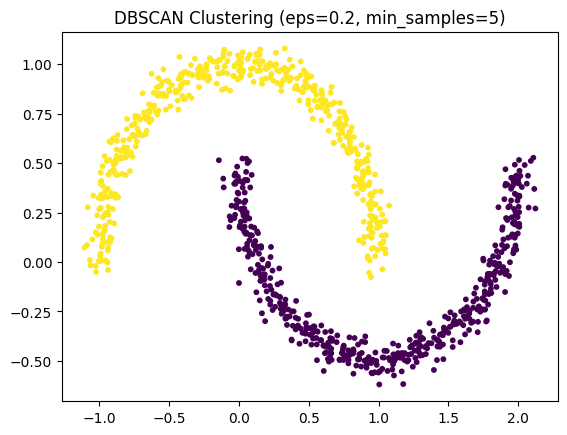

In [ ]:
# Implementar DBSCAN
eps_values = [0.05, 0.2]
min_samples = 5

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(X)

    # Visualizar los clusters
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=10)
    plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
    plt.show()



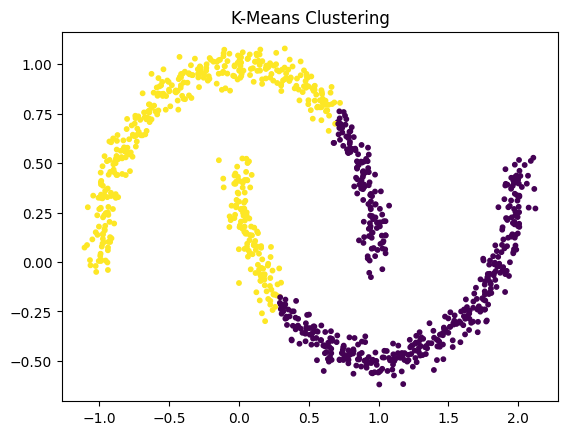

In [ ]:
# Comparar con K-Means
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# Visualizar K-Means
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', s=10)
plt.title("K-Means Clustering")
plt.show()

##PRUEBAS

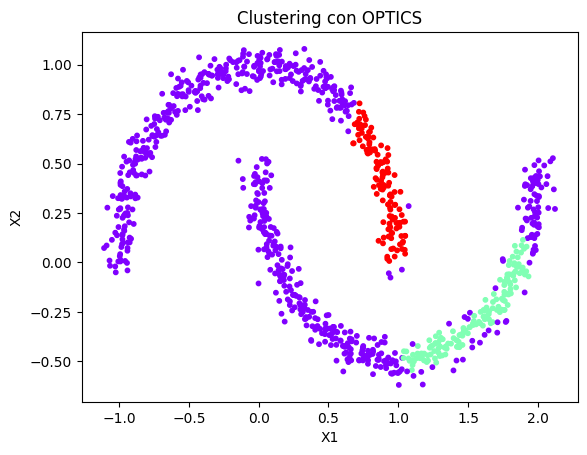

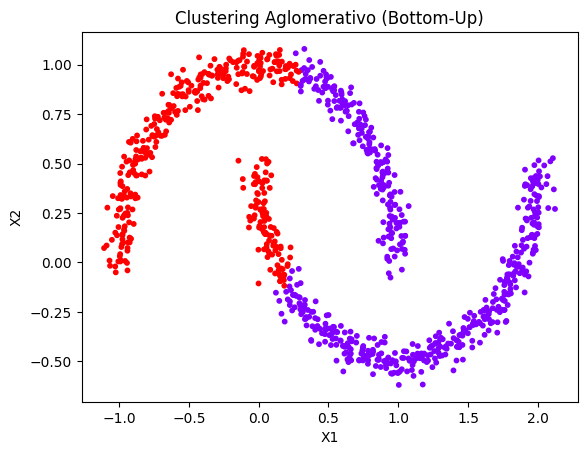

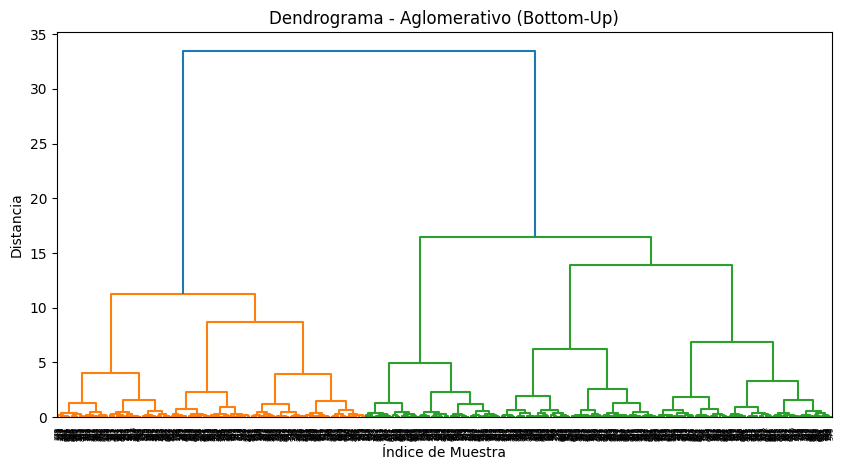

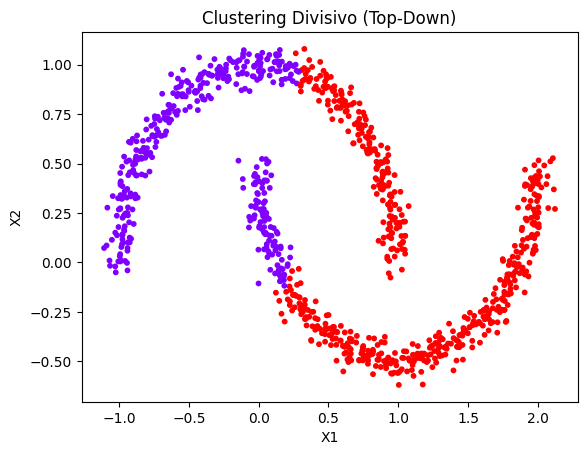

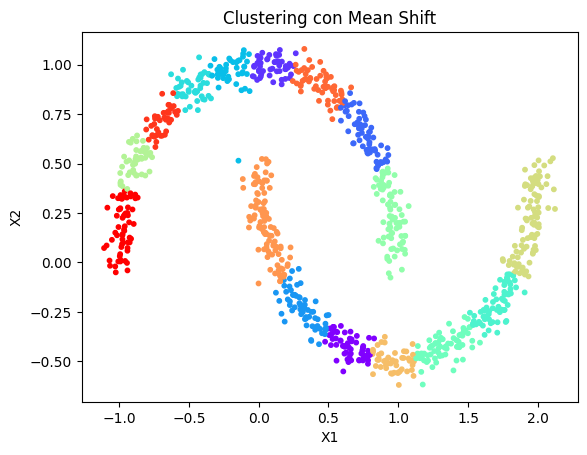

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN, OPTICS, AgglomerativeClustering, MeanShift
from scipy.cluster.hierarchy import dendrogram, linkage

# Generar datos
X, y = make_moons(n_samples=1000, noise=0.05, random_state=42)

# Función para graficar resultados
def plot_clusters(X, labels, title):
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow', s=10)
    plt.title(title)
    plt.xlabel("X1")
    plt.ylabel("X2")
    plt.show()

### 1. OPTICS
from sklearn.cluster import OPTICS

# Implementación de OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
optics_labels = optics.fit_predict(X)

# Graficar resultados de OPTICS
plot_clusters(X, optics_labels, "Clustering con OPTICS")

### 2. Aglomerativo (Bottom-Up)
from sklearn.cluster import AgglomerativeClustering

# Implementación de clustering jerárquico aglomerativo
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')
agglo_labels = agglo.fit_predict(X)

# Graficar resultados de Aglomerativo
plot_clusters(X, agglo_labels, "Clustering Aglomerativo (Bottom-Up)")

# Dendrograma
linkage_matrix = linkage(X, method='ward')
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title("Dendrograma - Aglomerativo (Bottom-Up)")
plt.xlabel("Índice de Muestra")
plt.ylabel("Distancia")
plt.show()

### 3. Divisivo (Top-Down)
# NOTA: Scikit-learn no implementa divisivo directamente, lo simulamos con dendrograma
from scipy.cluster.hierarchy import cut_tree

# Usar linkage para "simular" un enfoque divisivo
Z = linkage(X, method='ward')  # Dendrograma Ward
labels_divisive = cut_tree(Z, n_clusters=2).flatten()

# Graficar resultados de Divisivo
plot_clusters(X, labels_divisive, "Clustering Divisivo (Top-Down)")

### 4. Mean Shift
from sklearn.cluster import MeanShift

# Implementación de Mean Shift
mean_shift = MeanShift(bandwidth=0.25)  # Ajustar el parámetro de ancho de banda
mean_shift_labels = mean_shift.fit_predict(X)

# Graficar resultados de Mean Shift
plot_clusters(X, mean_shift_labels, "Clustering con Mean Shift")
